<a href="https://colab.research.google.com/github/raak-16/fake_new_detection_nm/blob/main/nm_fakenews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git config --global user.email "waafiqraakin@gmail.com"
!git config --global user.name "waafiqraakin"


In [2]:
!git add .

fatal: not a git repository (or any of the parent directories): .git


In [1]:
!git clone https://github.com/raak-16/fake_new_detection_nm

Cloning into 'fake_new_detection_nm'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), 7.69 MiB | 9.05 MiB/s, done.


In [4]:
%cd fake_new_detection_nm/

/content/fake_new_detection_nm


In [5]:
%pwd

'/content/fake_new_detection_nm'

In [9]:
!git init

Reinitialized existing Git repository in /content/fake_new_detection_nm/.git/


In [11]:
!git remote add origin https://github.com/raak-16/fake_new_detection_nm.git

error: remote origin already exists.


In [12]:
!git push origin master

error: src refspec master does not match any
error: failed to push some refs to 'https://github.com/raak-16/fake_new_detection_nm'


In [14]:
!git remote -v

origin	https://github.com/raak-16/fake_new_detection_nm (fetch)
origin	https://github.com/raak-16/fake_new_detection_nm (push)


In [6]:
!git add .

In [10]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [7]:
!git commit -m "added all dataset files"

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [8]:
!git push origin main

fatal: could not read Username for 'https://github.com': No such device or address


In [15]:
import pandas as pd


df=pd.read_csv('/content/train.csv')

ParserError: Error tokenizing data. C error: Expected 10 fields in line 4, saw 17


In [2]:
%cd fake_new_detection_nm/

/content/fake_new_detection_nm


In [3]:
%pwd

'/content/fake_new_detection_nm'

In [4]:
import pandas as pd


In [5]:
df=pd.read_csv('/content/fake_new_detection_nm/test (1).csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 10330: invalid start byte

In [6]:
df = pd.read_csv('/content/fake_new_detection_nm/test (1).csv', encoding='latin-1')


ParserError: Error tokenizing data. C error: Expected 36 fields in line 11, saw 37


In [8]:
import chardet

with open('/content/fake_new_detection_nm/test (1).csv', 'rb') as f:
    result = chardet.detect(f.read(10000))  # Read first 10,000 bytes to guess encoding

df = pd.read_csv('/content/train.csv', encoding=result['encoding'])

UnicodeDecodeError: 'ascii' codec can't decode byte 0xe2 in position 1564: ordinal not in range(128)

In [9]:
df = pd.read_csv('/content/fake_new_detection_nm/test (1).csv', encoding='utf-8', errors='ignore')  # Skips bad chars


TypeError: read_csv() got an unexpected keyword argument 'errors'

In [2]:
import pandas as pd
df = pd.read_csv('/content/train.csv', sep=';', encoding='latin-1')
print(df.head())

   Unnamed: 0                                              title  \
0           0  Palestinians switch off Christmas lights in Be...   
1           1  China says Trump call with Taiwan president wo...   
2           2   FAIL! The Trump Organizationâs Credit Score...   
3           3  Zimbabwe military chief's China trip was norma...   
4           4  THE MOST UNCOURAGEOUS PRESIDENT EVER Receives ...   

                                                text  label  
0  RAMALLAH, West Bank (Reuters) - Palestinians s...      1  
1  BEIJING (Reuters) - U.S. President-elect Donal...      1  
2  While the controversy over Trump s personal ta...      0  
3  BEIJING (Reuters) - A trip to Beijing last wee...      1  
4  There has never been a more UNCOURAGEOUS perso...      0  


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset (replace with your file path)

# Drop rows with missing values
df = df.dropna()

# Combine 'title' and 'text' for better features
df['content'] = df['title'] + " " + df['text']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df['content'], df['label'], test_size=0.2, random_state=42
)

In [21]:
X_train.shape

(19482,)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize text
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=200)
X_test_pad = pad_sequences(X_test_seq, maxlen=200)

# Build LSTM model
model = Sequential([
    Embedding(10000, 128),
    LSTM(64, dropout=0.2),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_split=0.1)

# Evaluate
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

Epoch 1/5
548/548 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.8993 - loss: 0.2517 - val_accuracy: 0.9554 - val_loss: 0.1311
Epoch 2/5
548/548 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.9680 - loss: 0.0929 - val_accuracy: 0.9564 - val_loss: 0.1332
Epoch 3/5
548/548 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9809 - loss: 0.0598 - val_accuracy: 0.9661 - val_loss: 0.1124
Epoch 4/5
548/548 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9866 - loss: 0.0408 - val_accuracy: 0.9579 - val_loss: 0.1233
Epoch 5/5
548/548 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9935 - loss: 0.0211 - val_accuracy: 0.9620 - val_loss: 0.1412
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9538 - loss: 0.1858
Test Accuracy: 0.95


![Class Distribution](class_dist.png)


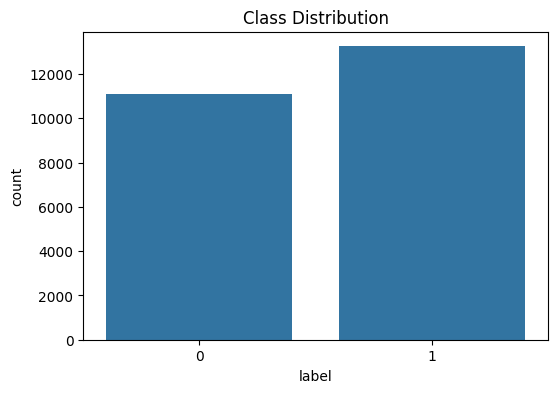

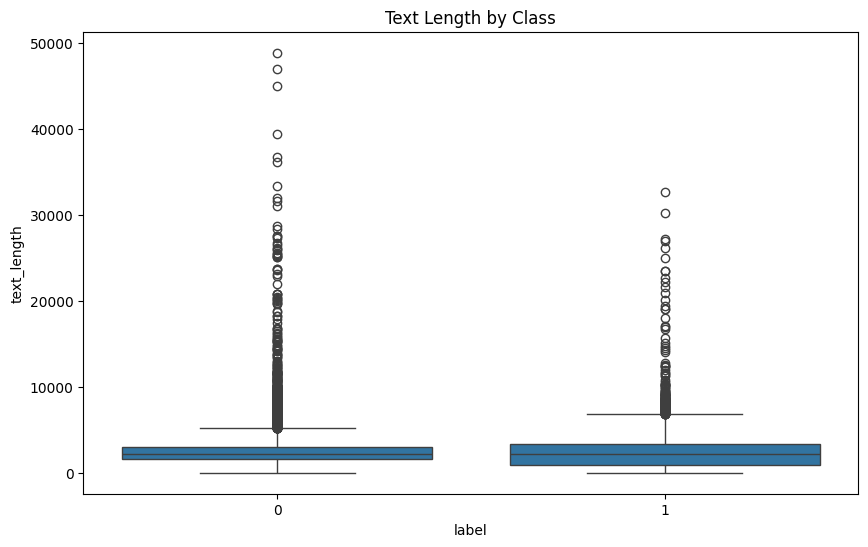

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Target Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df)
plt.title("Class Distribution")
plt.savefig("class_dist.png")
print("![Class Distribution](class_dist.png)")

# 2. Text Length Analysis
df['text_length'] = df['text'].apply(len)
plt.figure(figsize=(10,6))
sns.boxplot(x='label', y='text_length', data=df)
plt.title("Text Length by Class")
plt.savefig("text_length.png")

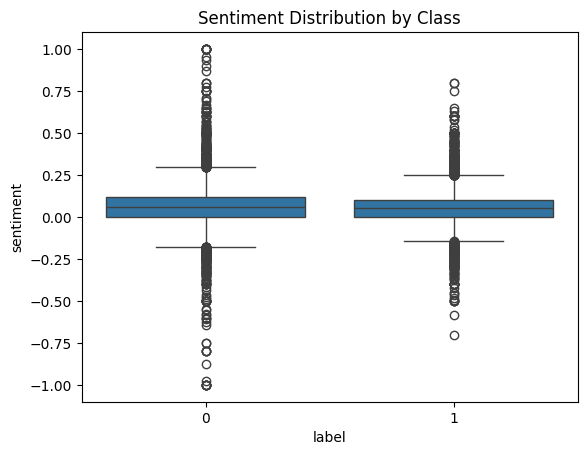

In [6]:
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt

df['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
sns.boxplot(x='label', y='sentiment', data=df)
plt.title("Sentiment Distribution by Class")
plt.savefig("sentiment_analysis.png")

In [8]:
!pip install textstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.3/175.3 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.4/939.4 kB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 83.0 MB/s eta 0:00:00


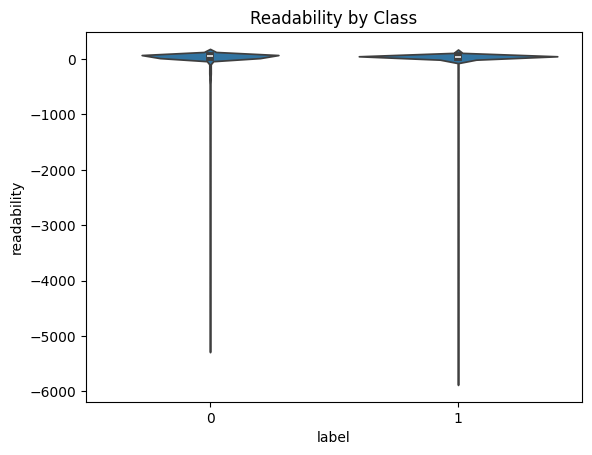

In [9]:
import textstat

df['readability'] = df['text'].apply(textstat.flesch_reading_ease)
sns.violinplot(x='label', y='readability', data=df)
plt.title("Readability by Class")
plt.savefig("readability.png")

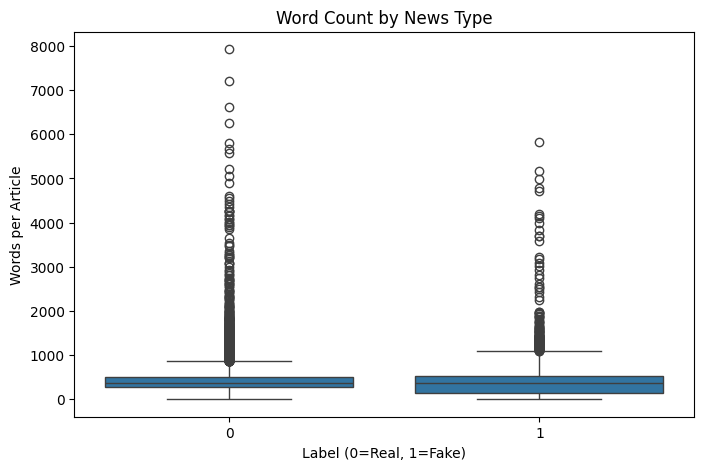

In [10]:
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8,5))
sns.boxplot(x='label', y='word_count', data=df)
plt.title("Word Count by News Type")
plt.xlabel("Label (0=Real, 1=Fake)")
plt.ylabel("Words per Article")
plt.savefig("word_count.png", bbox_inches='tight')

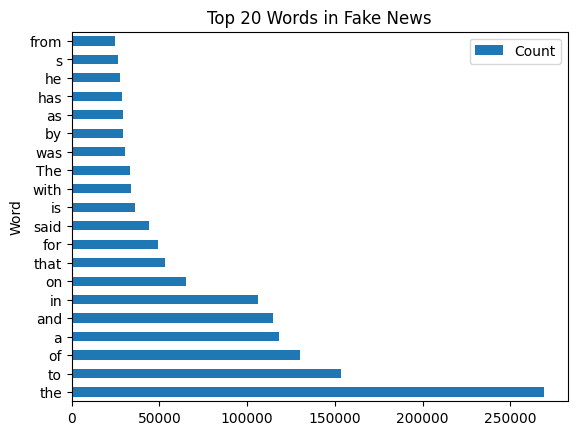

In [11]:
from collections import Counter
import pandas as pd

# Get top 20 words in fake news
fake_words = " ".join(df[df['label']==1]['text']).split()
fake_word_counts = Counter(fake_words).most_common(20)

pd.DataFrame(fake_word_counts, columns=['Word', 'Count']).plot.barh(x='Word', y='Count')
plt.title("Top 20 Words in Fake News")
plt.savefig("top_words.png", bbox_inches='tight')

In [13]:
df.columns

Index(['Unnamed: 0', 'title', 'text', 'label', 'content', 'sentiment',
       'readability', 'word_count'],
      dtype='object')

In [14]:
df.dtypes

,0
Unnamed: 0,int64
title,object
text,object
label,int64
content,object
sentiment,float64
readability,float64
word_count,int64


In [12]:
plt.figure(figsize=(10,5))
sns.countplot(y='subject', hue='label', data=df)
plt.title("News Subjects by Label")
plt.xlabel("Count")
plt.ylabel("Subject Category")
plt.legend(title="Label", labels=['Real', 'Fake'])
plt.savefig("subject_dist.png", bbox_inches='tight')

ValueError: Could not interpret value `subject` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x500 with 0 Axes>

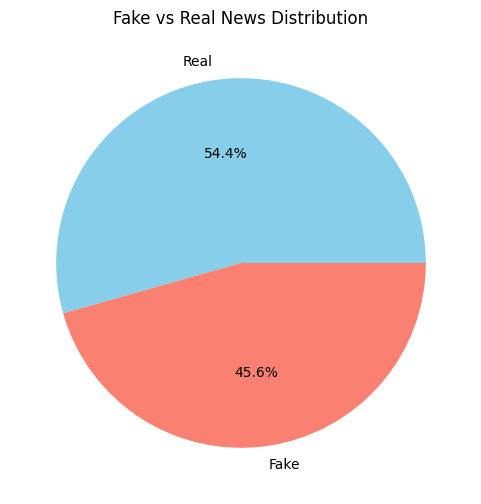

In [15]:
plt.figure(figsize=(6,6))
df['label'].value_counts().plot.pie(autopct='%1.1f%%',
                                   colors=['skyblue','salmon'],
                                   labels=['Real','Fake'])
plt.title("Fake vs Real News Distribution")
plt.ylabel("")
plt.savefig("label_pie.png", bbox_inches='tight')

<ipython-input-16-d8a2a6c08937>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='sentiment', data=df,


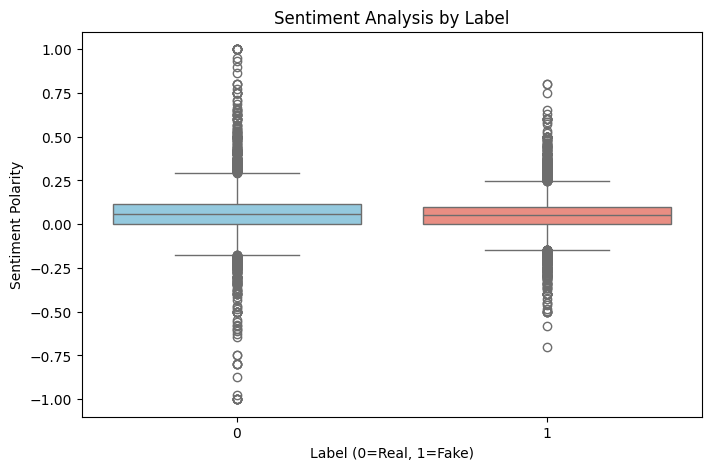

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(x='label', y='sentiment', data=df,
            palette=['skyblue','salmon'])
plt.title("Sentiment Analysis by Label")
plt.xlabel("Label (0=Real, 1=Fake)")
plt.ylabel("Sentiment Polarity")
plt.savefig("sentiment_box.png", bbox_inches='tight')

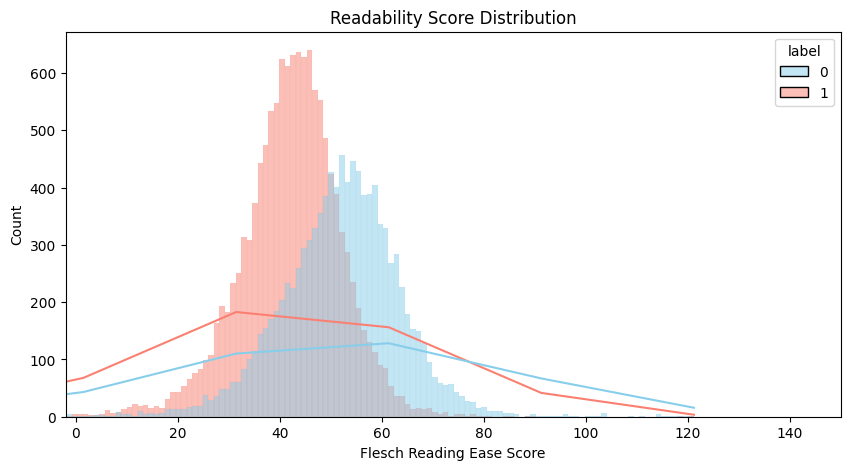

In [19]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='readability', hue='label',
             kde=True, palette=['skyblue','salmon'])
plt.title("Readability Score Distribution")
plt.xlabel("Flesch Reading Ease Score")
plt.xlim(left=-2,right=150)
plt.savefig("readability_hist.png", bbox_inches='tight')

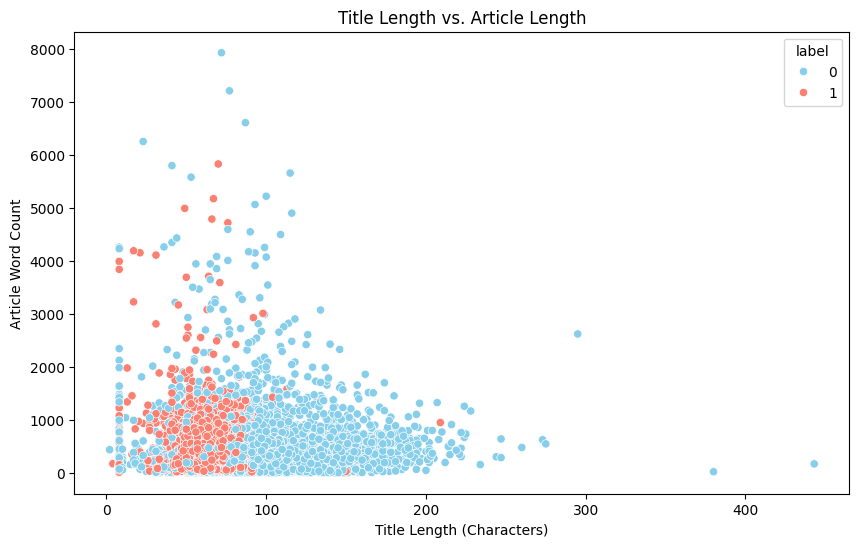

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['title'].str.len(), y='word_count',
                hue='label', data=df, palette=['skyblue','salmon'])
plt.title("Title Length vs. Article Length")
plt.xlabel("Title Length (Characters)")
plt.ylabel("Article Word Count")
plt.savefig("title_vs_content.png", bbox_inches='tight')

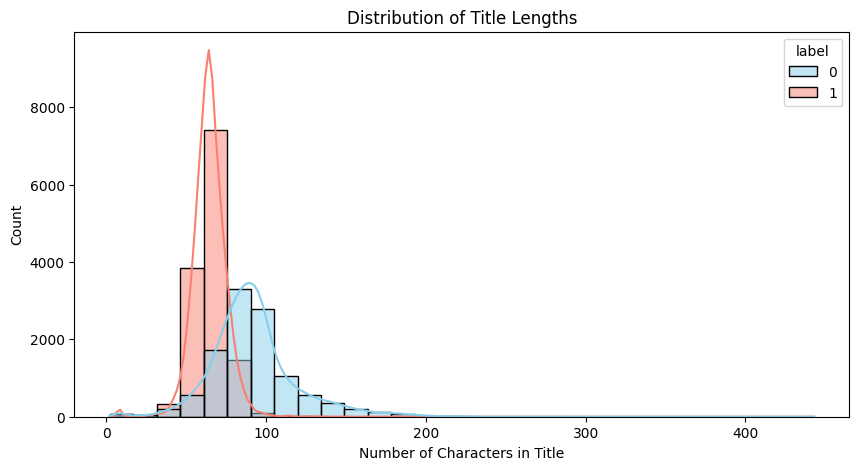

In [21]:
plt.figure(figsize=(10,5))
df['title_length'] = df['title'].str.len()
sns.histplot(data=df, x='title_length', hue='label', bins=30,
             kde=True, palette=['skyblue','salmon'])
plt.title("Distribution of Title Lengths")
plt.xlabel("Number of Characters in Title")
plt.savefig("title_length_hist.png", bbox_inches='tight')

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-23-ed0a2d06eef7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='label', y='avg_word_length', data=df,


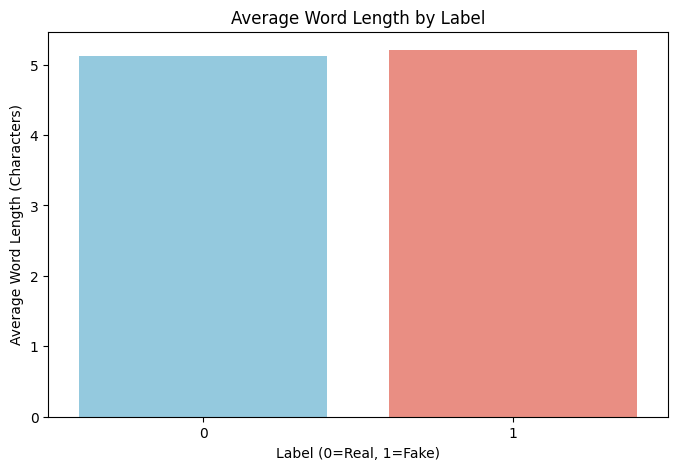

In [23]:
import numpy as np
df['avg_word_length'] = df['text'].apply(lambda x: np.mean([len(word) for word in str(x).split()]))

plt.figure(figsize=(8,5))
sns.barplot(x='label', y='avg_word_length', data=df,
            palette=['skyblue','salmon'], errorbar=None)
plt.title("Average Word Length by Label")
plt.xlabel("Label (0=Real, 1=Fake)")
plt.ylabel("Average Word Length (Characters)")
plt.savefig("word_length_bar.png", bbox_inches='tight')

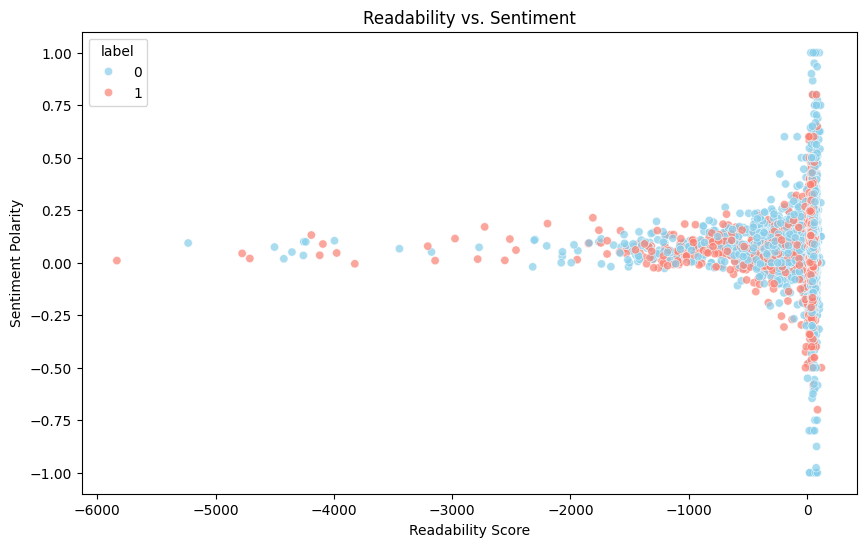

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='readability', y='sentiment', hue='label',
                data=df, palette=['skyblue','salmon'], alpha=0.7)
plt.title("Readability vs. Sentiment")
plt.xlabel("Readability Score")
plt.ylabel("Sentiment Polarity")
plt.savefig("readability_vs_sentiment.png", bbox_inches='tight')

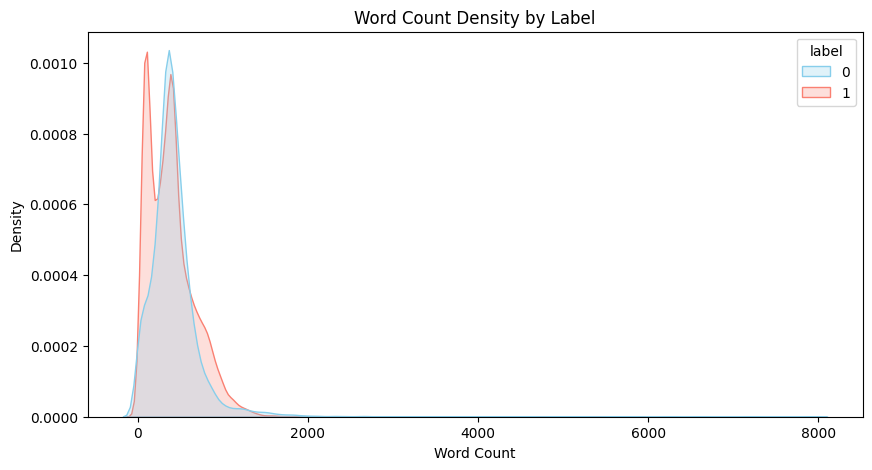

In [25]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=df, x='word_count', hue='label',
            palette=['skyblue','salmon'], fill=True)
plt.title("Word Count Density by Label")
plt.xlabel("Word Count")
plt.savefig("wordcount_kde.png", bbox_inches='tight')

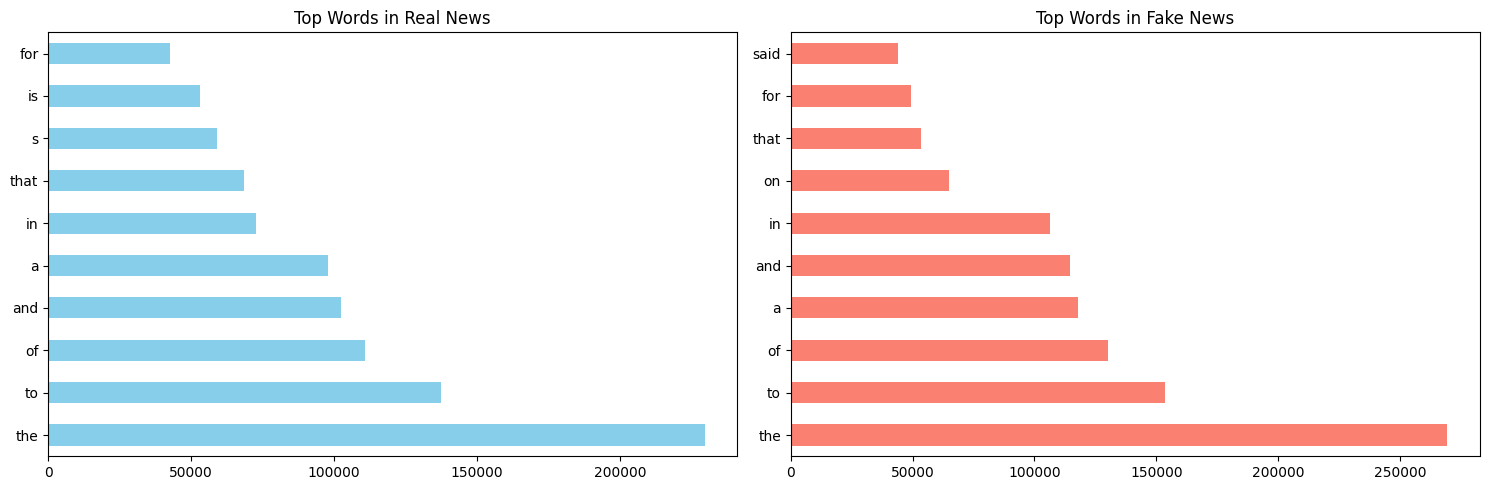

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

# Get top words for each class
real_words = " ".join(df[df['label']==0]['text']).split()
fake_words = " ".join(df[df['label']==1]['text']).split()

top_real = pd.Series(real_words).value_counts().head(10)
top_fake = pd.Series(fake_words).value_counts().head(10)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
top_real.plot.barh(ax=ax1, color='skyblue')
top_fake.plot.barh(ax=ax2, color='salmon')
ax1.set_title("Top Words in Real News")
ax2.set_title("Top Words in Fake News")
plt.tight_layout()
plt.savefig("top_words_comparison.png", bbox_inches='tight')

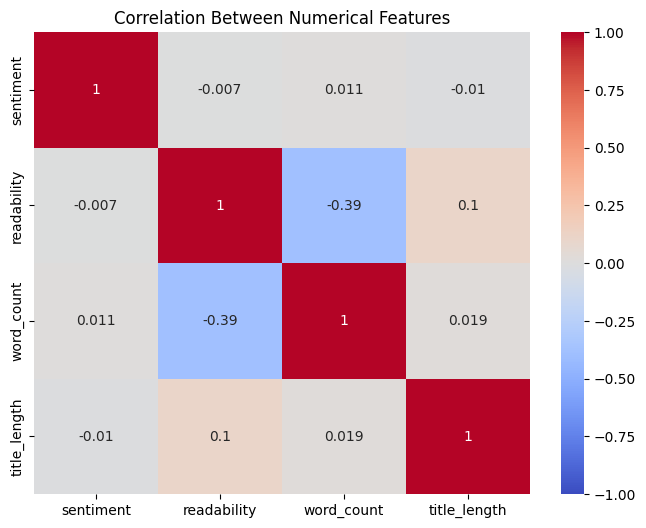

In [28]:
numerical_features = ['sentiment', 'readability', 'word_count', 'title_length']
plt.figure(figsize=(8,6))
sns.heatmap(df[numerical_features].corr(), annot=True,
            cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Numerical Features')
plt.savefig('correlation_heatmap.png', bbox_inches='tight')